In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv(r"C:\Users\nehas\OneDrive\Desktop\datasets\portfolio_data.csv")
df

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


In [2]:
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [3]:
df.tail()

,Date,AMZN,DPZ,BTC,NFLX
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010
1519,5/14/2019,1840.119995,272.859985,8183.830078,345.609985


In [4]:
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


In [5]:
df.isnull().sum()

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

In [6]:
df.dtypes

Date     object
AMZN    float64
DPZ     float64
BTC     float64
NFLX    float64
dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

Mean Squared Error: 220897.26620005516
        Date  AMZN_Predicted
0 2019-05-15     1508.864979
1 2019-05-16     1508.864979
2 2019-05-17     1508.864979


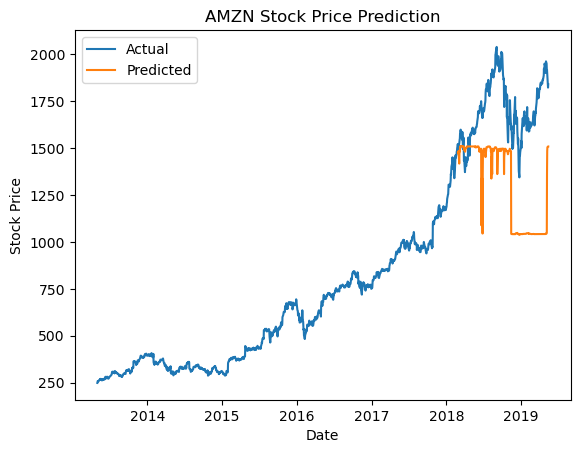

In [8]:
# Assuming you want to predict AMZN stock prices
target_stock = 'AMZN'

# Features are the other columns (excluding Date and the target stock)
features = df.columns.difference(['Date', target_stock])

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

# Separate features and target variable for training and testing sets
X_train, y_train = train_data[features], train_data[target_stock]
X_test, y_test = test_data[features], test_data[target_stock]

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Predict next 3 days
future_dates = pd.date_range(df['Date'].max() + pd.Timedelta(days=1), periods=3, freq='D')
future_data = pd.DataFrame({'Date': future_dates})
future_data[features] = df[features].iloc[-1]  # Assuming the latest data for features

# Make predictions for the next 3 days
future_predictions = model.predict(future_data[features])

# Display the predictions for the next 3 days
future_data[target_stock + '_Predicted'] = future_predictions
print(future_data[['Date', target_stock + '_Predicted']])

# Plot actual vs predicted values
plt.plot(df['Date'], df[target_stock], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{target_stock} Stock Price Prediction')
plt.show()

Mean Squared Error: 1880.4232817036548
        Date  DPZ_Predicted
0 2019-05-15     222.842294
1 2019-05-16     222.842294
2 2019-05-17     222.842294


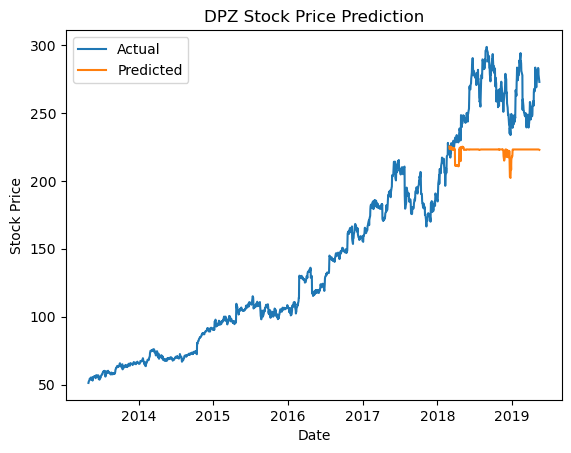

In [9]:
# Assuming you want to predict DPZ stock prices
target_stock = 'DPZ'

# Features are the other columns (excluding Date and the target stock)
features = df.columns.difference(['Date', target_stock])

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

# Separate features and target variable for training and testing sets
X_train, y_train = train_data[features], train_data[target_stock]
X_test, y_test = test_data[features], test_data[target_stock]

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Predict next 3 days
future_dates = pd.date_range(df['Date'].max() + pd.Timedelta(days=1), periods=3, freq='D')
future_data = pd.DataFrame({'Date': future_dates})
future_data[features] = df[features].iloc[-1]  # Assuming the latest data for features

# Make predictions for the next 3 days
future_predictions = model.predict(future_data[features])

# Display the predictions for the next 3 days
future_data[target_stock + '_Predicted'] = future_predictions
print(future_data[['Date', target_stock + '_Predicted']])

# Plot actual vs predicted values
plt.plot(df['Date'], df[target_stock], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{target_stock} Stock Price Prediction')
plt.show()

Mean Squared Error: 20902901.076406736
        Date  BTC_Predicted
0 2019-05-15   10347.386545
1 2019-05-16   10347.386545
2 2019-05-17   10347.386545


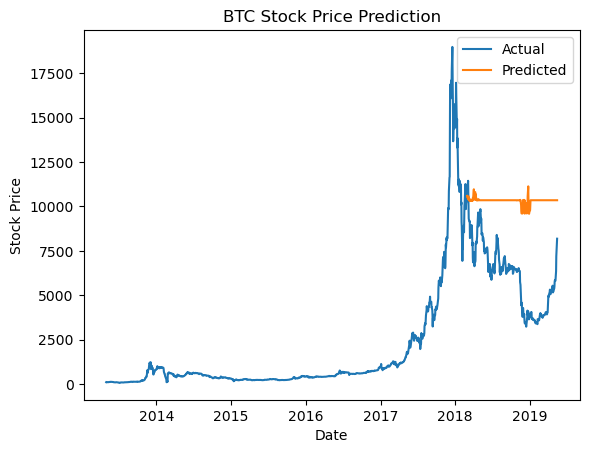

In [10]:
# Assuming you want to predict BTC stock prices
target_stock = 'BTC'

# Features are the other columns (excluding Date and the target stock)
features = df.columns.difference(['Date', target_stock])

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

# Separate features and target variable for training and testing sets
X_train, y_train = train_data[features], train_data[target_stock]
X_test, y_test = test_data[features], test_data[target_stock]

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Predict next 3 days
future_dates = pd.date_range(df['Date'].max() + pd.Timedelta(days=1), periods=3, freq='D')
future_data = pd.DataFrame({'Date': future_dates})
future_data[features] = df[features].iloc[-1]  # Assuming the latest data for features

# Make predictions for the next 3 days
future_predictions = model.predict(future_data[features])

# Display the predictions for the next 3 days
future_data[target_stock + '_Predicted'] = future_predictions
print(future_data[['Date', target_stock + '_Predicted']])

# Plot actual vs predicted values
plt.plot(df['Date'], df[target_stock], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{target_stock} Stock Price Prediction')
plt.show()

Mean Squared Error: 5304.215266057814
        Date  NFLX_Predicted
0 2019-05-15      281.355799
1 2019-05-16      281.355799
2 2019-05-17      281.355799


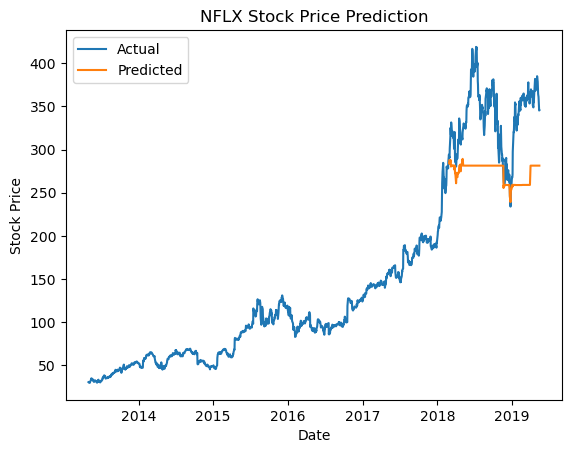

In [11]:
# Assuming you want to predict NFLX stock prices
target_stock = 'NFLX'

# Features are the other columns (excluding Date and the target stock)
features = df.columns.difference(['Date', target_stock])

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

# Separate features and target variable for training and testing sets
X_train, y_train = train_data[features], train_data[target_stock]
X_test, y_test = test_data[features], test_data[target_stock]

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Predict next 3 days
future_dates = pd.date_range(df['Date'].max() + pd.Timedelta(days=1), periods=3, freq='D')
future_data = pd.DataFrame({'Date': future_dates})
future_data[features] = df[features].iloc[-1]  # Assuming the latest data for features

# Make predictions for the next 3 days
future_predictions = model.predict(future_data[features])

# Display the predictions for the next 3 days
future_data[target_stock + '_Predicted'] = future_predictions
print(future_data[['Date', target_stock + '_Predicted']])

# Plot actual vs predicted values
plt.plot(df['Date'], df[target_stock], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{target_stock} Stock Price Prediction')
plt.show()

# 2. Sentiment analysis on the news/twitter related to a particular stock. 

In [12]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
#from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

In [13]:
data=pd.read_csv(r"C:\Users\nehas\OneDrive\Desktop\datasets\stock_tweets.csv")
data


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [14]:
stock_name = 'AMZN'
df1 =data[data['Stock Name'] == stock_name]
print(df1.shape)
df1.head()

(4089, 4)


,Date,Tweet,Stock Name,Company Name
48351,2022-09-29 22:40:47+00:00,A group of lawmakers led by Sen. Elizabeth War...,AMZN,"Amazon.com, Inc."
48352,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AMZN,"Amazon.com, Inc."
48353,2022-09-29 18:34:51+00:00,Today’s drop in $SPX is a perfect example of w...,AMZN,"Amazon.com, Inc."
48354,2022-09-29 15:57:59+00:00,Druckenmiller owned $CVNA this year \nMunger b...,AMZN,"Amazon.com, Inc."
48355,2022-09-29 15:10:30+00:00,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,AMZN,"Amazon.com, Inc."


In [15]:
sent_df = data.copy()
sent_df["sentiment_score"] = ''
sent_df["Negative"] = ''
sent_df["Neutral"] = ''
sent_df["Positive"] = ''
sent_df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",,,,
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",,,,
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",,,,
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",,,,
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",,,,


In [ ]:
%%time
sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in sent_df.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', sent_df.loc[indx, 'Tweet'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        sent_df.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        sent_df.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (sent_df.loc[indexx, 'Tweet'])
        print (indx)
        break